## Trabalho Final de Disciplica - Introdução a Processamento de Dados

#### Turma: Engenharia de Dados - Turma 02
#### Nome Completo: Marcos Aurelio Mendes Oliveira
#### Matrícula: 2519887



#### ---------------------------------------------------------------------------------------------------------------------------------------------

### Instruções:
##### O objetivo deste trabalho é processar os dados do Enem 2023, salvar os resultados em um banco de dados PostgreSQL, consultar esses dados utilizando Pandas (Python) e responder a um conjunto de perguntas analíticas.
#### Passos para Execução

1. Download dos Dados
Baixe o arquivo de microdados do Enem 2023 no link abaixo:

[Microdados Enem 2023 - INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

Utilize o dicionário de dados disponível no site para entender o significado de cada coluna.

2. Processamento dos Dados

Realize o tratamento necessário nos dados, como:

Limpeza (remoção de valores ausentes ou inconsistentes)

Seleção de colunas relevantes

Conversão de tipos de dados, se necessário

Descreva brevemente os principais tratamentos realizados.

3. Armazenamento no Banco de Dados

Salve os dados tratados em um banco de dados PostgreSQL.

Documente:

O nome do banco de dados e das tabelas utilizadas

O método/ferramenta utilizada para realizar a carga (por exemplo: script Python, Pandas, PgAdmin, etc.)

4. Consulta e Análise com Pandas

Utilize a biblioteca Pandas (Python) para consultar os dados diretamente do banco de dados.

Responda às perguntas analíticas fornecidas utilizando funções do Pandas.

Apresente as respostas juntamente com o código utilizado para obtê-las.



## =====================================================

#### Import csv

In [25]:
# Carregando bibliotecas
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

In [2]:
# Carregando arquivos
microdata_df = pd.read_csv('data/MICRODADOS_ENEM_2023.csv', sep=';' , encoding='latin-1')


### Tratamento dos dados

In [3]:
# Selecionando dados necessários para a analise
columns_to_analyze = [
    'TP_PRESENCA_LC',
    'TP_SEXO',
    'TP_PRESENCA_MT',
    'TP_FAIXA_ETARIA',
    'TP_ESCOLA',
    'Q001',
    'Q002',
    'Q006',
    'NU_NOTA_REDACAO',
    'NU_NOTA_MT'
]

filtered_data = microdata_df.filter(columns_to_analyze)
del microdata_df # Deleta o dataframe maior para diminuir o uso de memória


In [4]:
# Substitui os dados NaN das notas de Matematica e de Redação => Se a pessoa faltou ou foi desqualificada deixa 0 na nota
filtered_data['NU_NOTA_MT'] = np.where(filtered_data['TP_PRESENCA_MT'] != 1, 0, filtered_data['NU_NOTA_MT'])
filtered_data['NU_NOTA_REDACAO'] = np.where(filtered_data['TP_PRESENCA_LC'] != 1, 0, filtered_data['NU_NOTA_REDACAO'])

In [5]:
# Calculo de faltas em redação
total_students = filtered_data['TP_PRESENCA_LC'].count()
count_abstence = (filtered_data['TP_PRESENCA_LC'] == 0).sum()
abstence_languages_and_codes_rate = (count_abstence * 100) / total_students

# Calculo de faltas em matematica
total_students = filtered_data['TP_PRESENCA_MT'].count()
count_abstence = (filtered_data['TP_PRESENCA_MT'] == 0).sum()
abstence_math_rate = (count_abstence * 100) / total_students

df_absence = pd.DataFrame({
                                'rate_languages_​and_codes':[abstence_languages_and_codes_rate],
                                'rate_math': [abstence_math_rate]  
                             })

In [6]:
# Distribuição de faixa etária

age_range_dictionary_names = {
    1: 'menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}

grouped_by_range_age = filtered_data.groupby(by='TP_FAIXA_ETARIA').size().reset_index(name='quantity')
total_count = grouped_by_range_age['quantity'].sum()

grouped_by_range_age['percentage'] = grouped_by_range_age['quantity'].map(lambda x: ((x * 100) / total_count).round(2) )
grouped_by_range_age['label'] = grouped_by_range_age['TP_FAIXA_ETARIA'].map(age_range_dictionary_names)
grouped_by_range_age = grouped_by_range_age.rename(columns={'TP_FAIXA_ETARIA': 'id'})




In [7]:
# Q3 - Médias das notas por sexo
mens_present_in_math_exam = filtered_data[(filtered_data['TP_PRESENCA_MT'] == 1) & (filtered_data['TP_SEXO'] == 'M')]
mens_mean_of_results_in_math = round(mens_present_in_math_exam['NU_NOTA_MT'].sum() / mens_present_in_math_exam['NU_NOTA_MT'].count(), 2)

females_present_in_math_exam = filtered_data[(filtered_data['TP_PRESENCA_MT'] == 1) & (filtered_data['TP_SEXO'] == 'F')]
females_mean_of_results_in_math = round(females_present_in_math_exam['NU_NOTA_MT'].sum() / females_present_in_math_exam['NU_NOTA_MT'].count(), 2)


mens_present_in_lc_exam = filtered_data[(filtered_data['TP_PRESENCA_LC'] == 1) & (filtered_data['TP_SEXO'] == 'M')]
mens_mean_of_results_in_lc = round(mens_present_in_lc_exam['NU_NOTA_REDACAO'].sum() / mens_present_in_lc_exam['NU_NOTA_REDACAO'].count(), 2)

females_present_in_lc_exam = filtered_data[(filtered_data['TP_PRESENCA_LC'] == 1) & (filtered_data['TP_SEXO'] == 'F')]
females_mean_of_results_in_lc = round(females_present_in_lc_exam['NU_NOTA_REDACAO'].sum() / females_present_in_lc_exam['NU_NOTA_REDACAO'].count(), 2)

df_calculates_data_per_sex = pd.DataFrame({
    'mens_mean_of_results_in_math': [mens_mean_of_results_in_math],
    'females_mean_of_results_in_math': [females_mean_of_results_in_math],
    'mens_mean_of_results_in_lc': [mens_mean_of_results_in_lc],
    'females_mean_of_results_in_lc': [females_mean_of_results_in_lc]
})


In [8]:
# Q4 - Médias por tipo de escola

private_schools_present_in_math_exam = filtered_data[(filtered_data['TP_PRESENCA_MT'] == 1) & (filtered_data['TP_ESCOLA'] == 3)]
private_schools_mean_of_results_in_math = round(mens_present_in_math_exam['NU_NOTA_MT'].sum() / mens_present_in_math_exam['NU_NOTA_MT'].count(), 2)

public_schools_present_in_math_exam = filtered_data[(filtered_data['TP_PRESENCA_MT'] == 1) & (filtered_data['TP_ESCOLA'] == 2)]
public_schools_mean_of_results_in_math = round(public_schools_present_in_math_exam['NU_NOTA_MT'].sum() / public_schools_present_in_math_exam['NU_NOTA_MT'].count(), 2)

private_schools_present_in_lc_exam = filtered_data[(filtered_data['TP_PRESENCA_LC'] == 1) & (filtered_data['TP_ESCOLA'] == 3)]
private_schools_mean_of_results_in_lc = round(private_schools_present_in_lc_exam['NU_NOTA_REDACAO'].sum() / private_schools_present_in_lc_exam['NU_NOTA_REDACAO'].count(), 2)

public_schools_present_in_lc_exam = filtered_data[(filtered_data['TP_PRESENCA_LC'] == 1) & (filtered_data['TP_ESCOLA'] == 2)]
public_schools_mean_of_results_in_lc = round(public_schools_present_in_lc_exam['NU_NOTA_REDACAO'].sum() / public_schools_present_in_lc_exam['NU_NOTA_REDACAO'].count(), 2)

df_calculates_data_per_school_type = pd.DataFrame({
    'private_schools_mean_of_results_in_math': [private_schools_mean_of_results_in_math],
    'public_schools_mean_of_results_in_math': [public_schools_mean_of_results_in_math],
    'private_schools_mean_of_results_in_lc': [private_schools_mean_of_results_in_lc],
    'public_schools_mean_of_results_in_lc': [public_schools_mean_of_results_in_lc]
})

In [9]:
# Escolaridade do pai

dictionary_names = {
    'A': 'Nunca estudou',
    'B': 'Fundamental 1',
    'C': 'Fundamental 2',
    'D': 'Ensino Médio Incompleto',
    'E': 'Ensino Médio Completo',
    'F': 'Graduação completa',
    'G': 'Pós Graduação completa',
    'H': 'Não informado'
}

students_presents_in_math = filtered_data[filtered_data['TP_PRESENCA_MT'] == 1]

grouped_by_father_education = students_presents_in_math.groupby('Q001', as_index=False)[['NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().round(2)
grouped_by_father_education['label'] = grouped_by_father_education['Q001'].map(dictionary_names)
grouped_by_father_education = grouped_by_father_education.rename(columns={'Q001': 'id'})

# Escolaridade da mãe

dictionary_names = {
    'A': 'Nunca estudou',
    'B': 'Fundamental 1',
    'C': 'Fundamental 2',
    'D': 'Ensino Médio Incompleto',
    'E': 'Ensino Médio Completo',
    'F': 'Graduação completa',
    'G': 'Pós Graduação completa',
    'H': 'Não informado'
}

students_presents_in_math = filtered_data[filtered_data['TP_PRESENCA_MT'] == 1]

grouped_by_mother_education = students_presents_in_math.groupby('Q002', as_index=False)[['NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().round(2)
grouped_by_mother_education['label'] = grouped_by_mother_education['Q002'].map(dictionary_names)
grouped_by_mother_education = grouped_by_mother_education.rename(columns={'Q002': 'id'})



In [10]:
# Escolaridade dos pais

dictionary_names = {
    "A": "Nenhuma Renda",
    "B": "Até R$ 1.320,00",
    "C": "De R$ 1.320,01 até R$ 1.980,00",
    "D": "De R$ 1.980,01 até R$ 2.640,00",
    "E": "De R$ 2.640,01 até R$ 3.300,00",
    "F": "De R$ 3.300,01 até R$ 3.960,00",
    "G": "De R$ 3.960,01 até R$ 5.280,00",
    "H": "De R$ 5.280,01 até R$ 6.600,00",
    "I": "De R$ 6.600,01 até R$ 7.920,00",
    "J": "De R$ 7.920,01 até R$ 9.240,00",
    "K": "De R$ 9.240,01 até R$ 10.560,00",
    "L": "De R$ 10.560,01 até R$ 11.880,00",
    "M": "De R$ 11.880,01 até R$ 13.200,00",
    "N": "De R$ 13.200,01 até R$ 15.840,00",
    "O": "De R$ 15.840,01 até R$ 19.800,00",
    "P": "De R$ 19.800,01 até R$ 26.400,00",
    "Q": "Acima de R$ 26.400,00"
}

students_presents_in_math = filtered_data[filtered_data['TP_PRESENCA_MT'] == 1]

grouped_by_income = students_presents_in_math.groupby('Q006', as_index=False)[['NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().round(2)
grouped_by_income['label'] = grouped_by_income['Q006'].map(dictionary_names)
grouped_by_income = grouped_by_income.rename(columns={'Q006': 'id'})


## Tratamentos Realizados

- Os principais tratamentos realizados foram a separação das colunas do dataframe original para um dataframe menor, otimizando a memória e facilitando o processamento.
- Em todas os tratamentos que visavam médias das notas foram retirados os alunos que não compareceram para não haver alteração nos dados
- Os dados foram ordenados no modelo que devem ser salvos no banco de dados

### Insert no Banco de Dados

In [26]:
# Simula o arquivo config.py
load_dotenv()
database_name = os.getenv('DATABASE_NAME')
database_user = os.getenv('DATABASE_USER')
database_password = os.getenv('DATABASE_PASSWORD')
database_port = os.getenv('DATABASE_PORT')
database_host = os.getenv('DATABASE_HOST')
engine = create_engine(f'mysql+pymysql://{database_user}:{database_password}@{database_host}:{database_port}/{database_name}')

In [ ]:
# Criando conexão com o banco de dados. Para este passo é importante que você insira os dados no arquivo .env do projeto
with engine.begin() as conn:
    df_absence.to_sql('abstence_calculated_data', engine, if_exists='replace')
    grouped_by_range_age.to_sql('age_range_calculated_data', engine, if_exists='replace')
    df_calculates_data_per_sex.to_sql('sex_calculated_data', engine, if_exists='replace')
    df_calculates_data_per_school_type.to_sql('school_type_calculated_data', engine, if_exists='replace')
    grouped_by_mother_education.to_sql('mother_education_calculated_data', engine, if_exists='replace')
    grouped_by_father_education.to_sql('father_education_calculated_data', engine, if_exists='replace')
    grouped_by_income.to_sql('income_calculated_data', engine, if_exists='replace')

engine.dispose()



In [ ]:
# Liberação de memória
del filtered_data
del df_absence
del df_calculates_data_per_sex
del grouped_by_range_age
del df_calculates_data_per_sex
del df_calculates_data_per_school_type
del grouped_by_mother_education
del grouped_by_father_education
del grouped_by_income

## banco de dados
- Foi utilizado o SGBD MySql
- O banco todo foi criado via pandas
- Foram criadas tabelas com dados já calculados para agilizar o processo de busca dos dados na fase de carregamento

## Tabelas do banco
- abstence_calculated_data => Salva os dos de faltas nas provas
- age_range_calculated_data => Salva os dados calculados da média por faixa etária
- father_education_calculated_data => Salva os dados calculados da média por escolariddae do pai
- income_calculated_data => Salva os dados calculados da média por renda dos pais
- mother_education_calculated_data => Salva os dados calculados da média por escolaridade da mae
- school_type_calculated_data => Salva os dados calculados da média por tipo de escola
- sex_calculated_data => Salva os dados calculados da média por sexo

### Recuperação dos dados usando Pandas

In [30]:
query_to_receive_abstence_calculated_data = 'select * from abstence_calculated_data'
data_abstence = pd.read_sql(query_to_receive_abstence_calculated_data, engine)


query_to_get_age_range = 'select percentage, label, id from age_range_calculated_data'
data_age_range = pd.read_sql(query_to_get_age_range, engine)

query_to_get_sex = 'select * from sex_calculated_data'
data_sex = pd.read_sql(query_to_get_sex, engine)

query_to_get_school_type = 'select * from school_type_calculated_data'
data_school_type = pd.read_sql(query_to_get_school_type, engine)

query_to_get_mother_education = 'select * from mother_education_calculated_data'
data_mother_education = pd.read_sql(query_to_get_mother_education, engine)

query_to_get_father_education = 'select * from father_education_calculated_data'
data_father_education = pd.read_sql(query_to_get_father_education, engine)

query_to_get_income = 'select * from income_calculated_data'
data_income = pd.read_sql(query_to_get_income, engine)

engine.dispose()


### Perguntas:

#### 1 - Qual o percentual de faltas dos cantidatos na disciplina de Matemática e Redação?

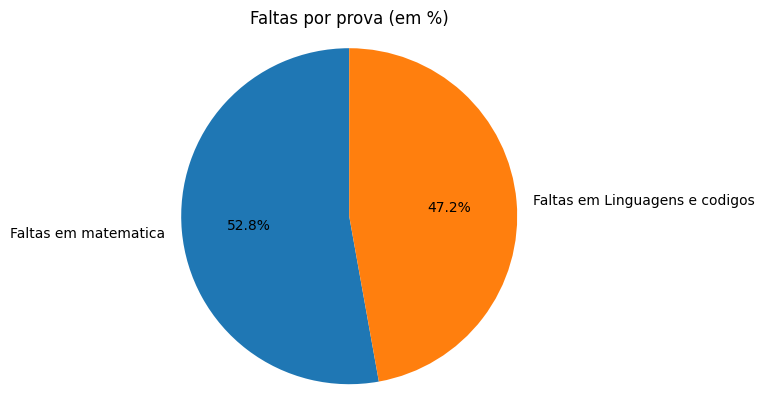

In [34]:
data_abstence
graphic = {
    'Faltas em matematica': data_abstence['rate_math'][0],
    'Faltas em Linguagens e codigos': data_abstence['rate_languages_​and_codes'][0],
}

plt.pie(graphic.values(), labels=graphic.keys(), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Faltas por prova (em %)')
plt.show()

#### 2 - Se formos olhar para a distribuição das idades dos alunos, como estaria a distribuição dos alunos por faixas etárias?

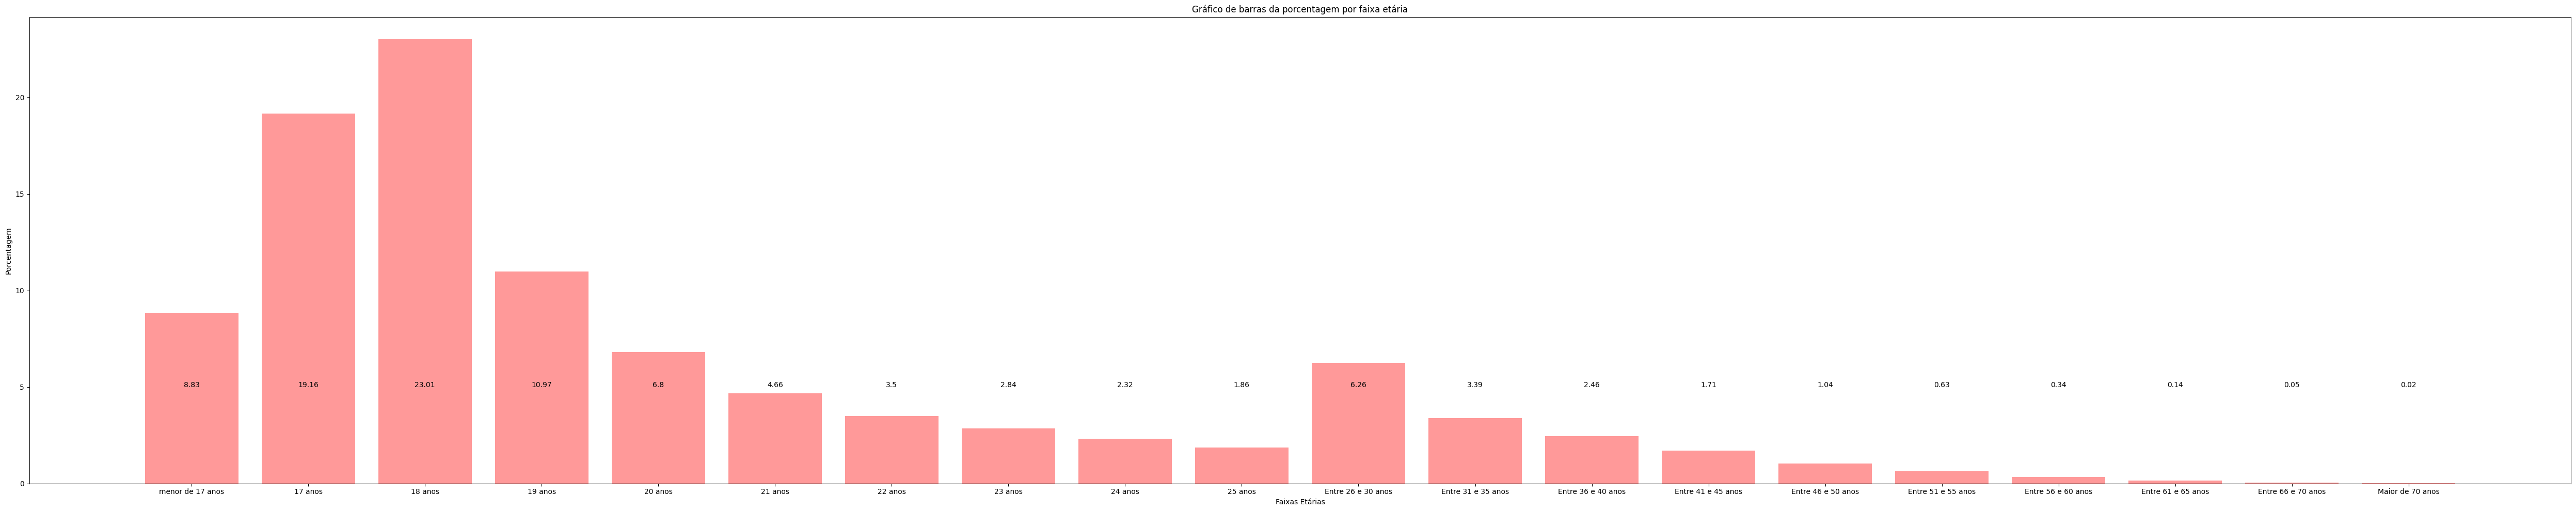

In [15]:
plt.figure(figsize=(50, 10))

for data in data_age_range.values:
    plt.bar(data[1], data[0], color='#FF9999')
    plt.text(data[2] - 1, 5, data[0], ha='center')


plt.xlabel('Faixas Etárias')
plt.ylabel('Porcentagem')
plt.title('Gráfico de barras da porcentagem por faixa etária')
plt.tight_layout()
plt.show()
plt.close()



### 3 - Quem tem as melhores notas em matemática e redação, candidatos do sexo masculino ou feminino?

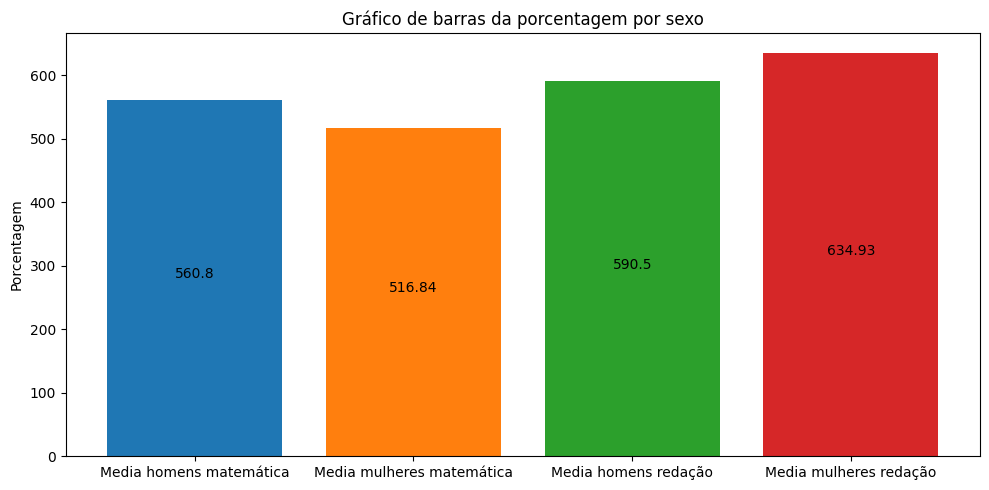

In [16]:
# Para resposta dessa questão foi considerada a média das notas dos alunos presentes (excluindo faltas)


data = data_sex.values[0]

# data_age_range['females_mean_of_results_in_math']

graphic = {
    'Media homens matemática': data[1],
    'Media mulheres matemática': data[2],
    'Media homens redação': data[3],
    'Media mulheres redação': data[4]
}

plt.figure(figsize=(10, 5))
counter = 0

for key, value in graphic.items():
    plt.bar(key, value)
    plt.text(counter, value / 2, value, ha='center')
    counter += 1

plt.ylabel('Porcentagem')
plt.title('Gráfico de barras da porcentagem por sexo')
plt.tight_layout()
plt.show()
plt.close()


### 4 - Há alguma influência no tipo da escola (publica e privada) nas notas de matemática e redação?

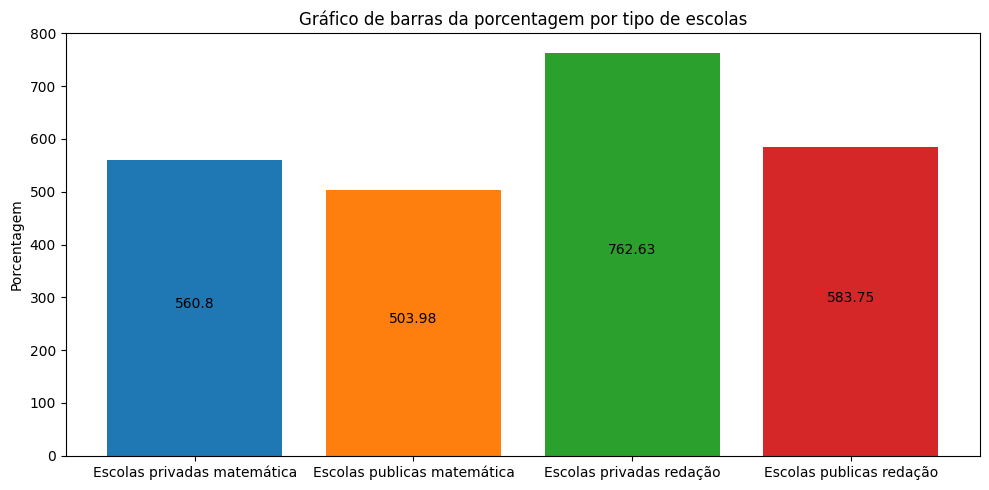

In [17]:
# Para resposta dessa questão foi considerada a média das notas dos alunos presentes (excluindo faltas)
data = data_school_type.values[0]

graphic = {
    'Escolas privadas matemática': data[1],
    'Escolas publicas matemática': data[2],
    'Escolas privadas redação': data[3],
    'Escolas publicas redação': data[4]
}

plt.figure(figsize=(10, 5))
counter = 0

for key, value in graphic.items():
    plt.bar(key, value)
    plt.text(counter, value / 2, value, ha='center')
    counter += 1

plt.ylabel('Porcentagem')
plt.title('Gráfico de barras da porcentagem por tipo de escolas')
plt.tight_layout()
plt.show()
plt.close()

### 5 - Qual a influência da escolaridade do Pai nas notas de Matemática e Redação?

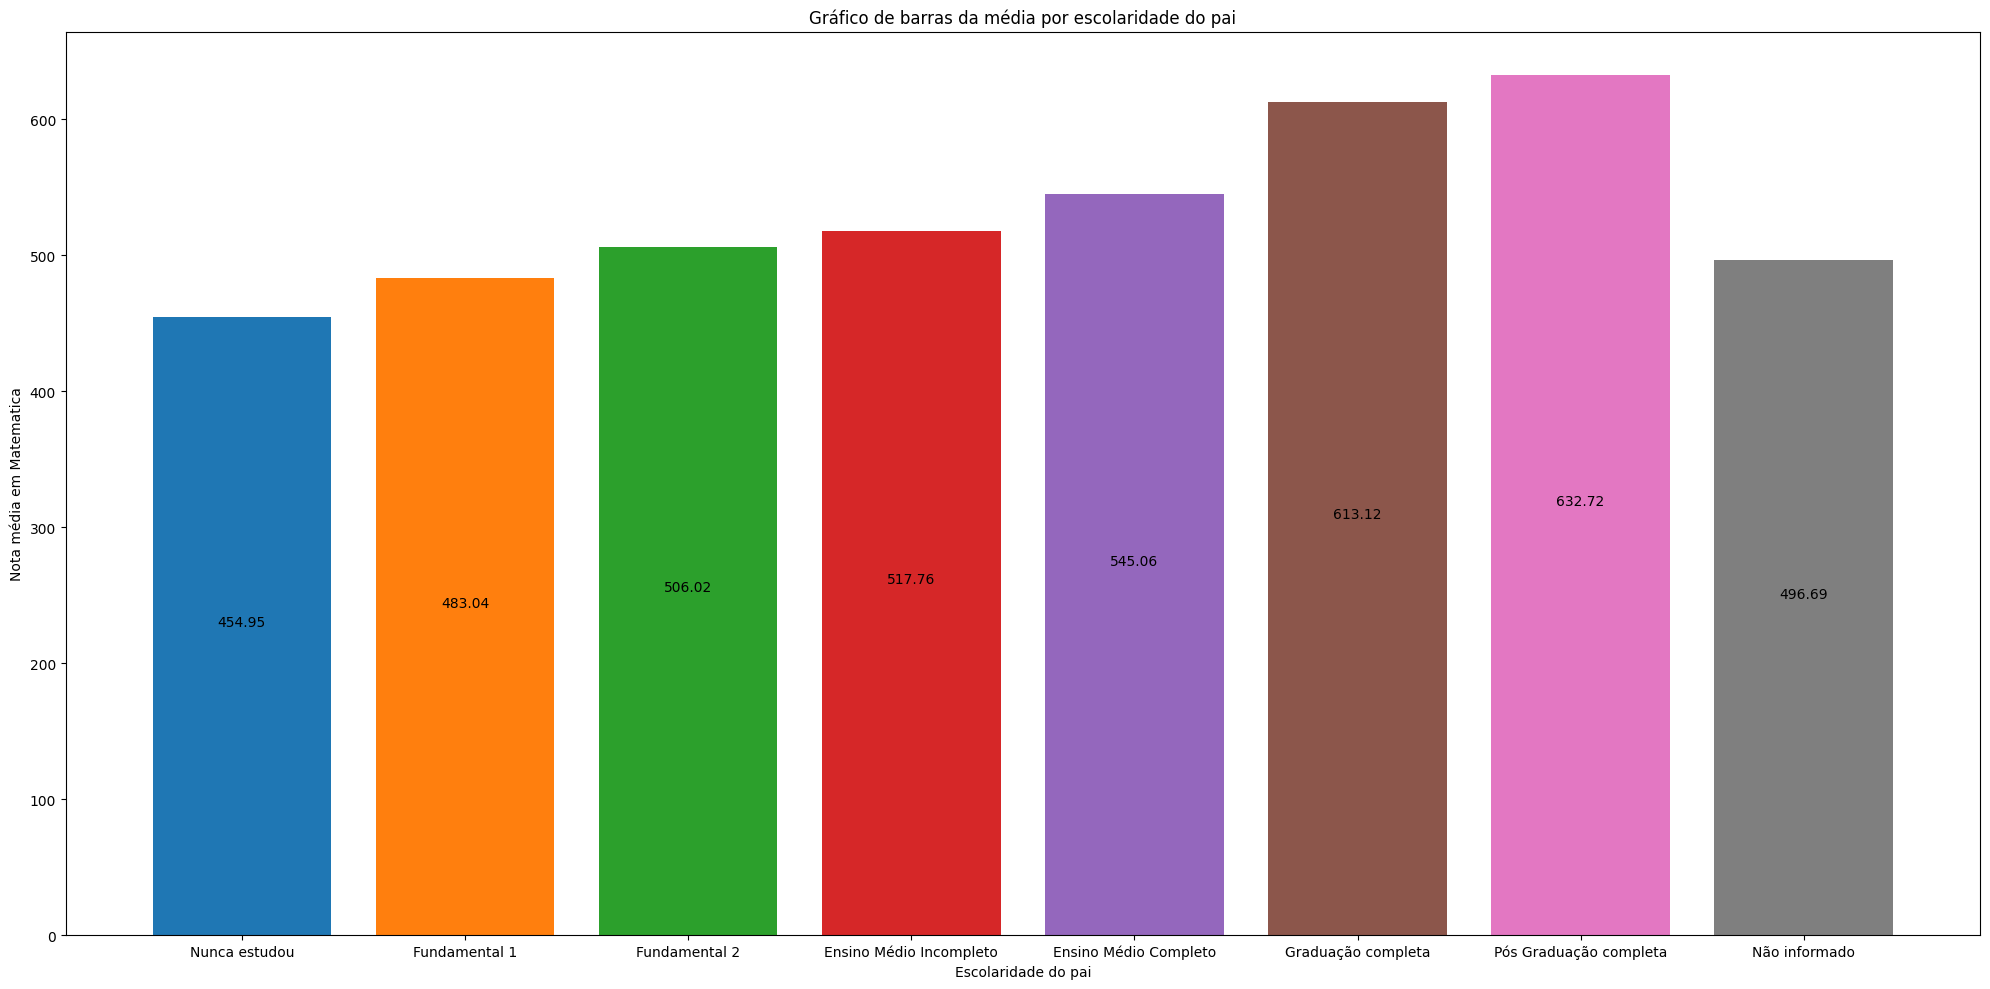

In [18]:
plt.figure(figsize=(20, 10))

for data in data_father_education.values:
    plt.bar(data[4], data[2])
    plt.text(data[0], data[2] / 2, data[2], ha='center')


plt.xlabel('Escolaridade do pai')
plt.ylabel('Nota média em Matematica')
plt.title('Gráfico de barras da média por escolaridade do pai')
plt.tight_layout()
plt.show()
plt.close()


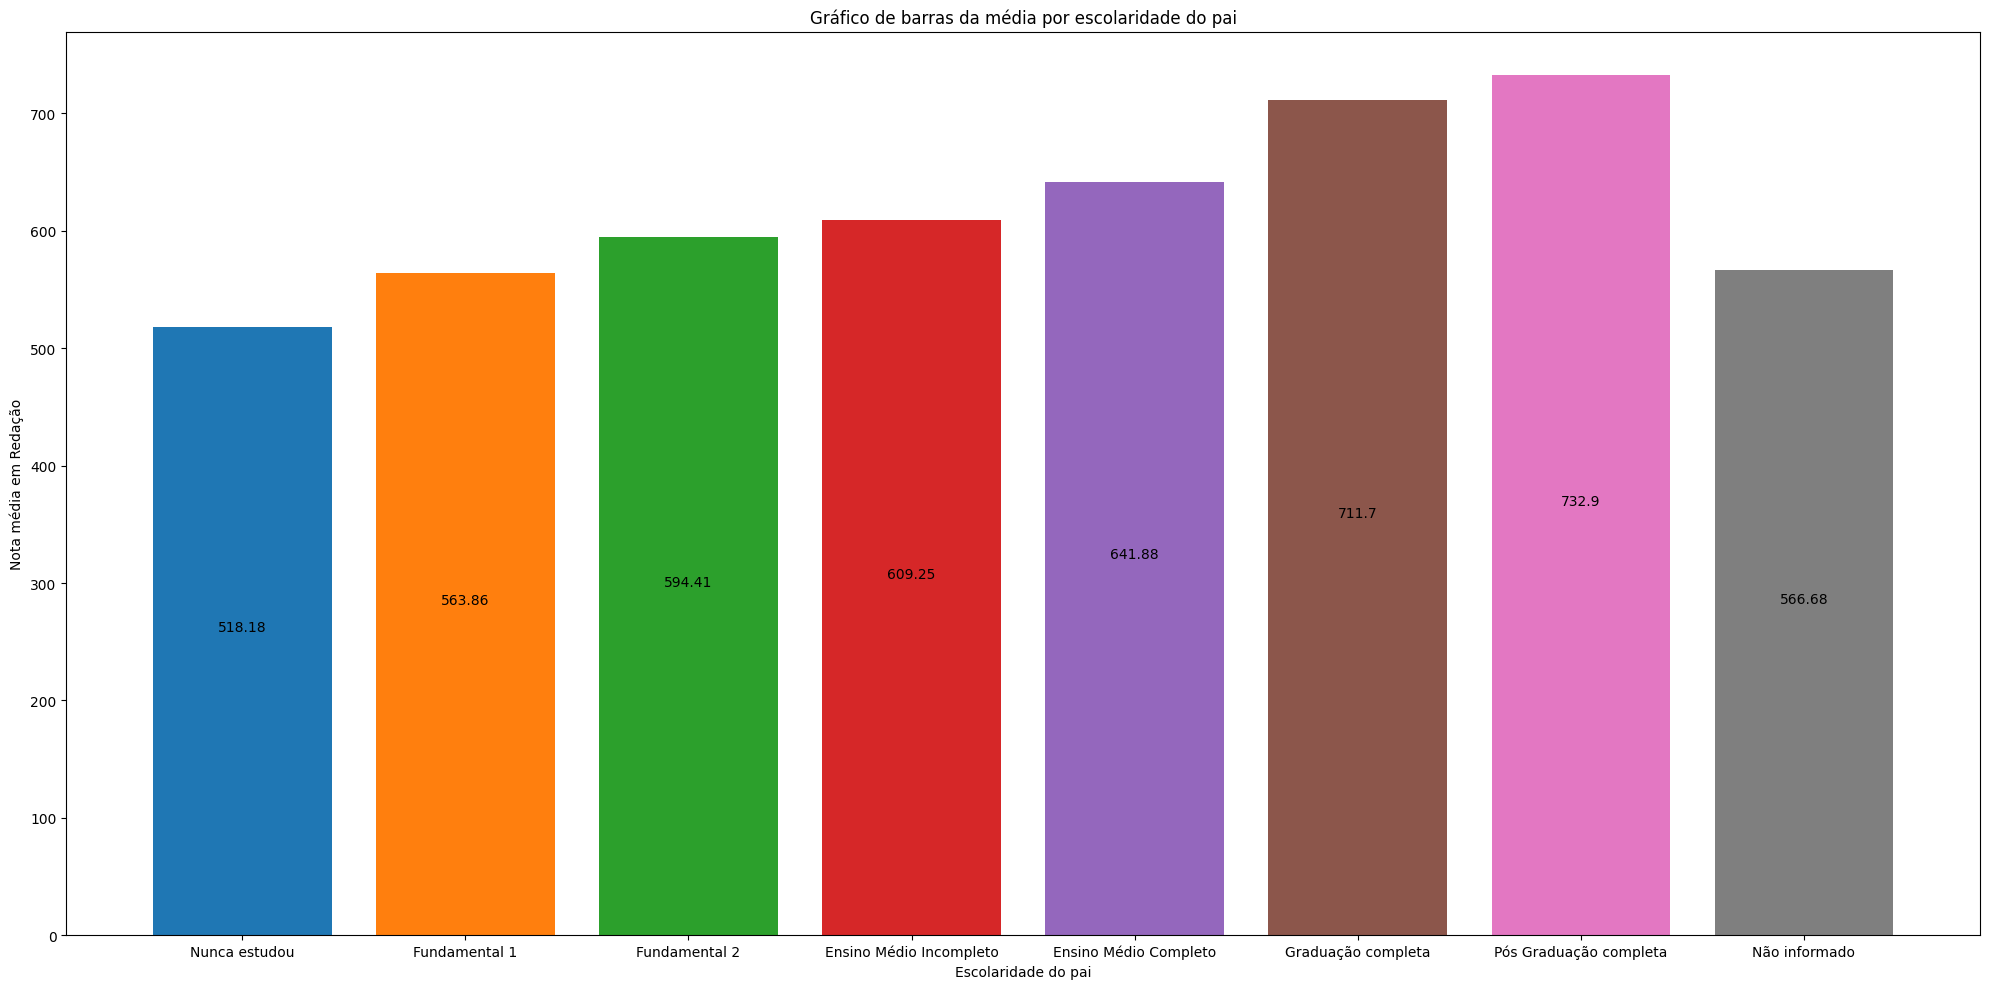

In [19]:
plt.figure(figsize=(20, 10))

for data in data_father_education.values:
    plt.bar(data[4], data[3])
    plt.text(data[0], data[3] / 2, data[3], ha='center')


plt.xlabel('Escolaridade do pai')
plt.ylabel('Nota média em Redação')
plt.title('Gráfico de barras da média por escolaridade do pai')
plt.tight_layout()
plt.show()
plt.close()


### 6 - Qual a influência da escolaridade do Mãe nas notas de Matemática e Redação?

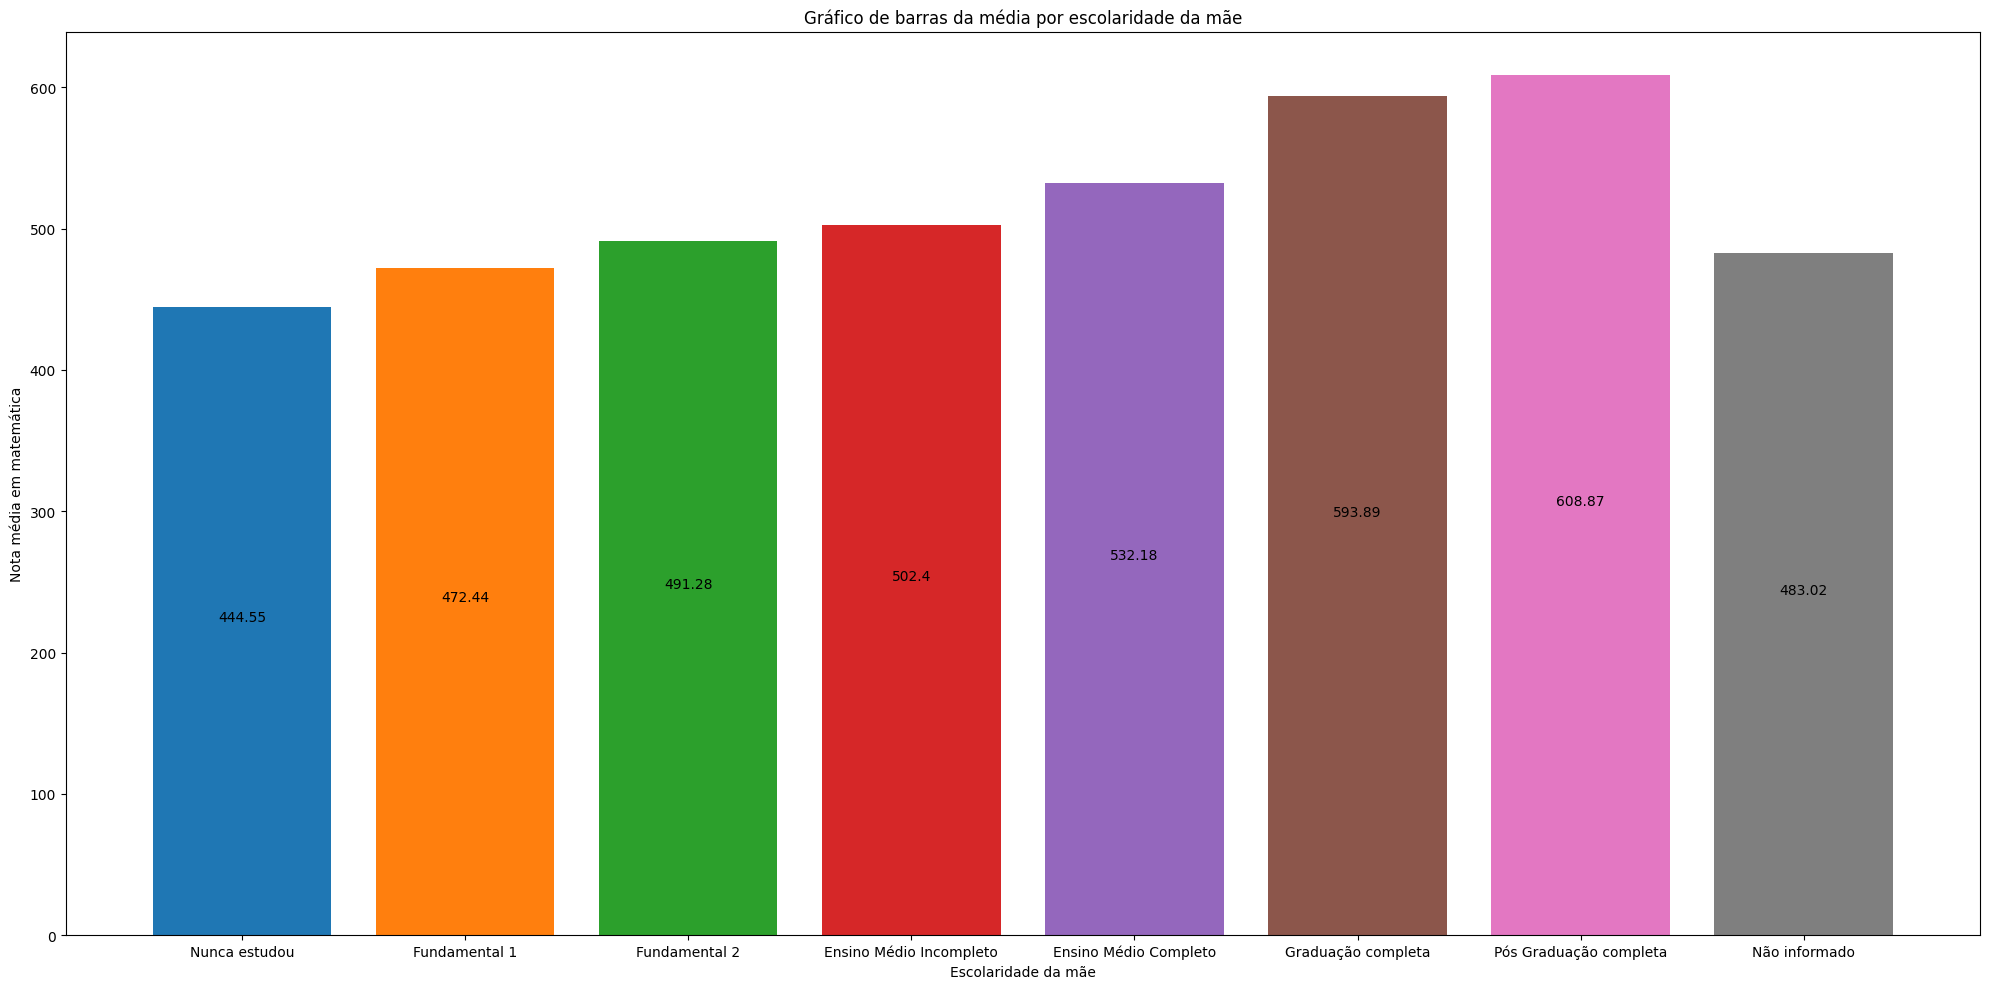

In [20]:
plt.figure(figsize=(20, 10))

for data in data_mother_education.values:
    plt.bar(data[4], data[2])
    plt.text(data[0], data[2] / 2, data[2], ha='center')


plt.xlabel('Escolaridade da mãe')
plt.ylabel('Nota média em matemática')
plt.title('Gráfico de barras da média por escolaridade da mãe')
plt.tight_layout()
plt.show()
plt.close()


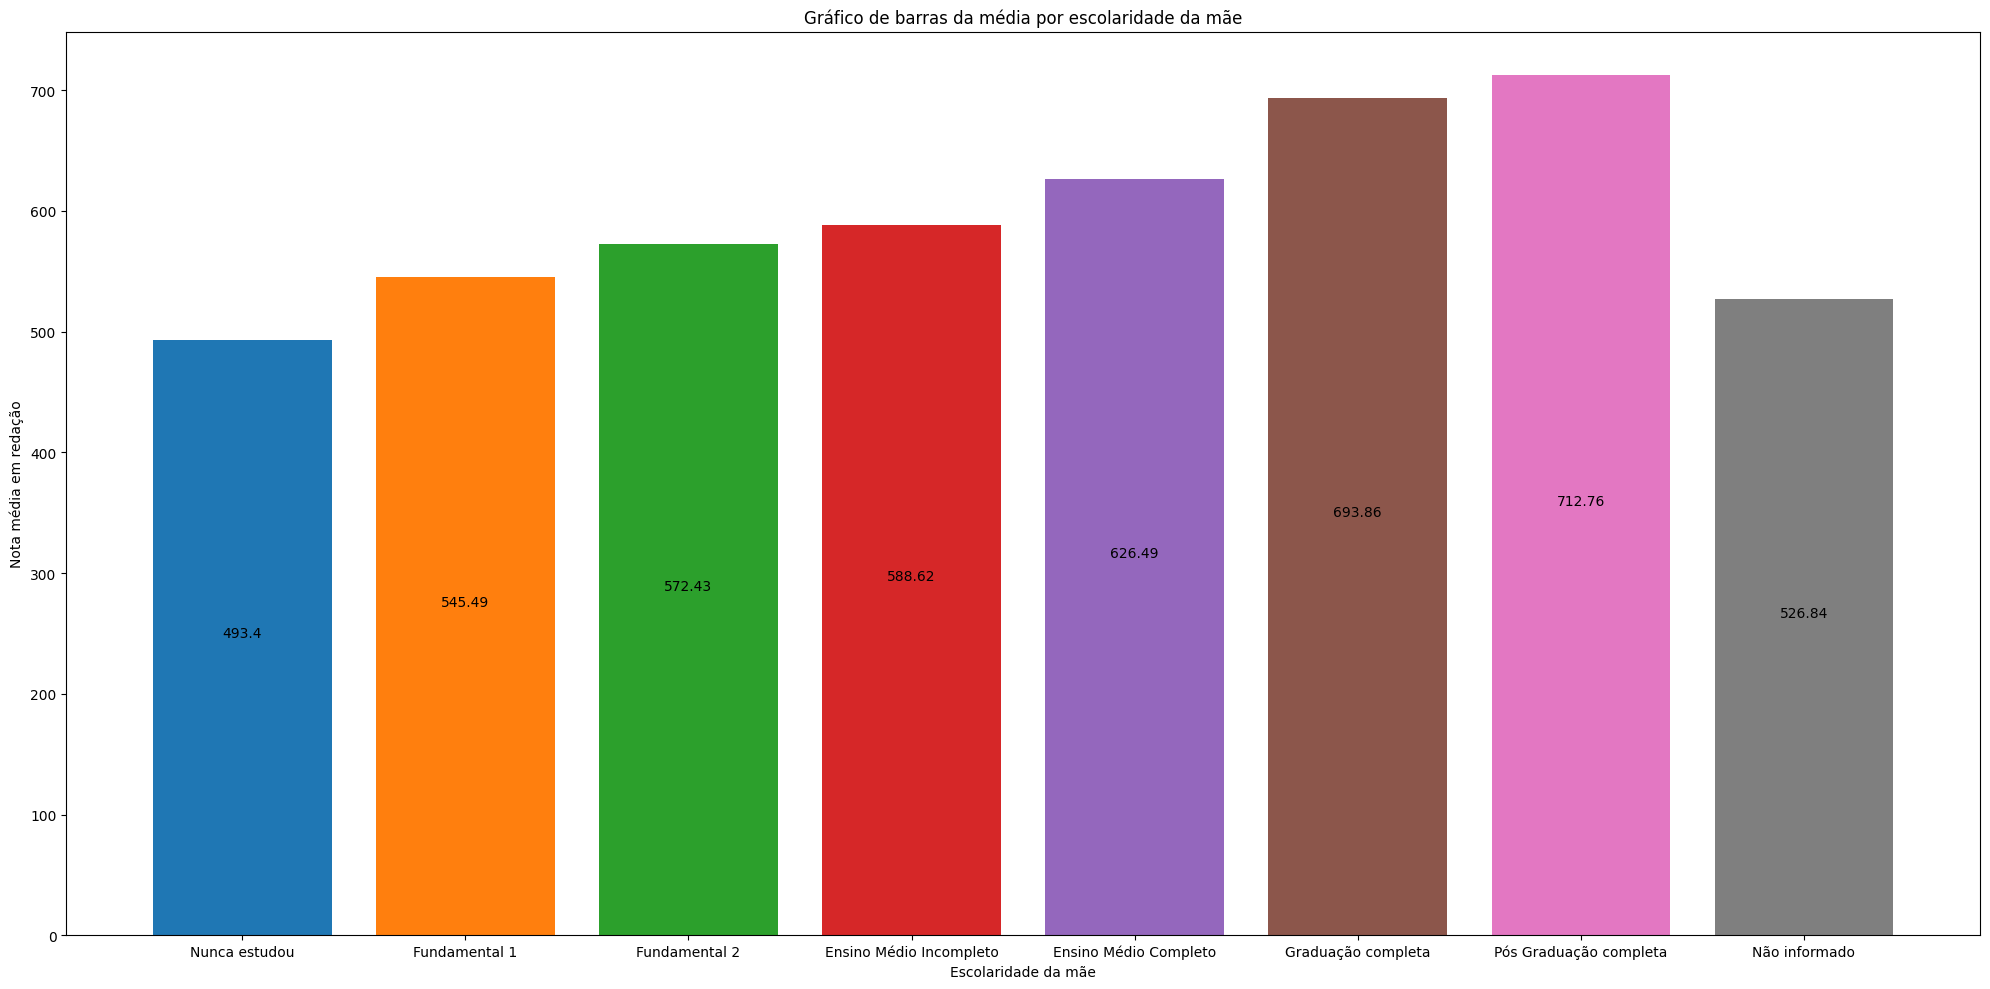

In [21]:
plt.figure(figsize=(20, 10))

for data in data_mother_education.values:
    plt.bar(data[4], data[3])
    plt.text(data[0], data[3] / 2, data[3], ha='center')


plt.xlabel('Escolaridade da mãe')
plt.ylabel('Nota média em redação')
plt.title('Gráfico de barras da média por escolaridade da mãe')
plt.tight_layout()
plt.show()
plt.close()


### 7 - Qual a influência da renda do Pai e da Mãe nas notas de Matemática e Redação?

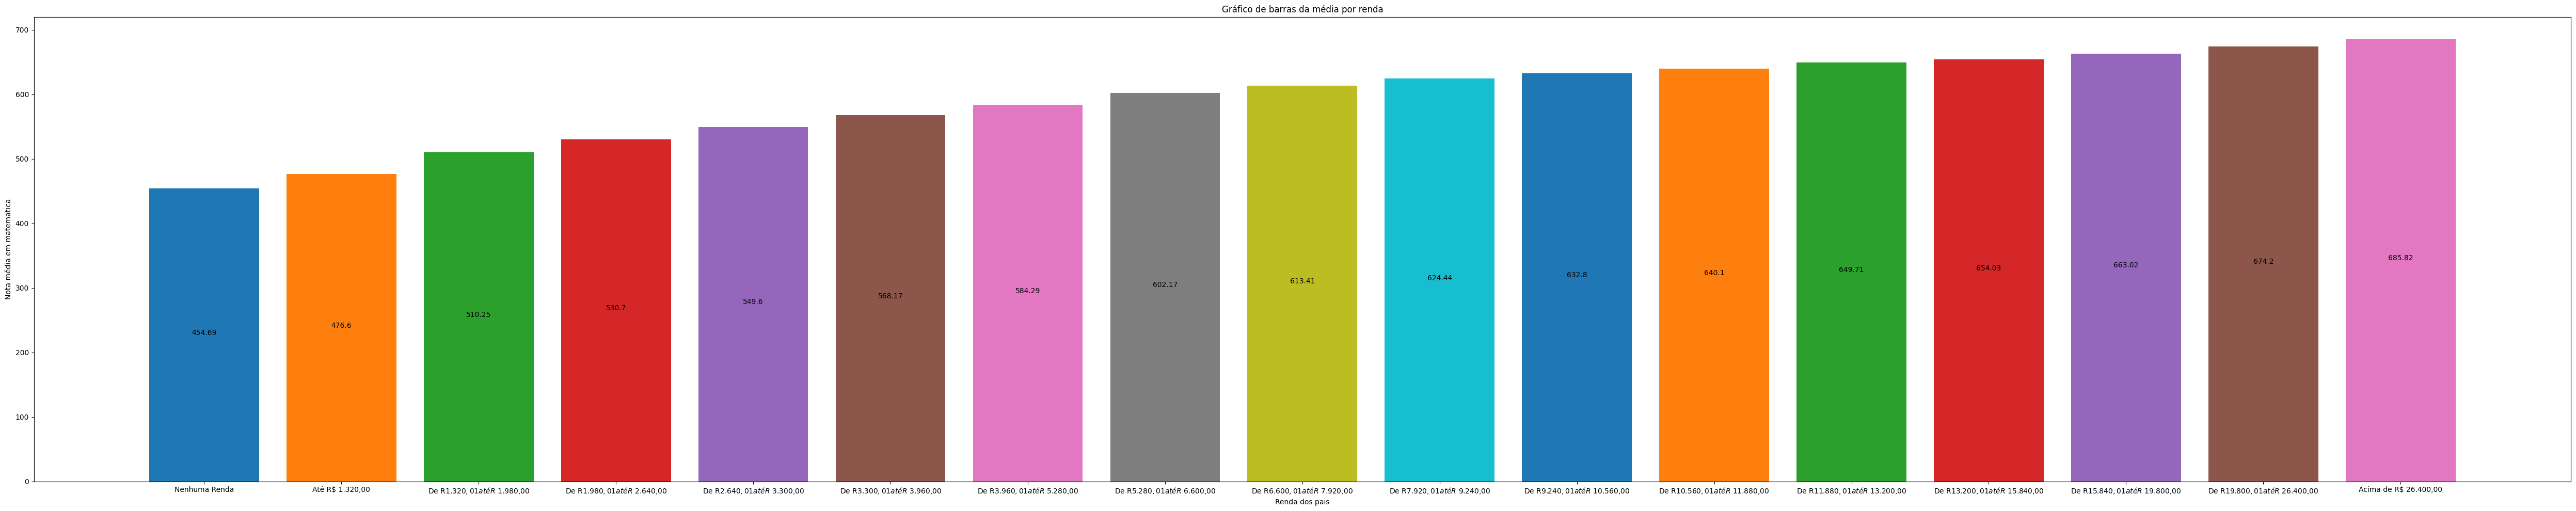

In [22]:
plt.figure(figsize=(50, 10))

for data in data_income.values:
    plt.bar(data[4], data[2])
    plt.text(data[0], data[2] / 2, data[2], ha='center')


plt.xlabel('Renda dos pais')
plt.ylabel('Nota média em matematica')
plt.title('Gráfico de barras da média por renda')
plt.tight_layout()
plt.show()
plt.close()

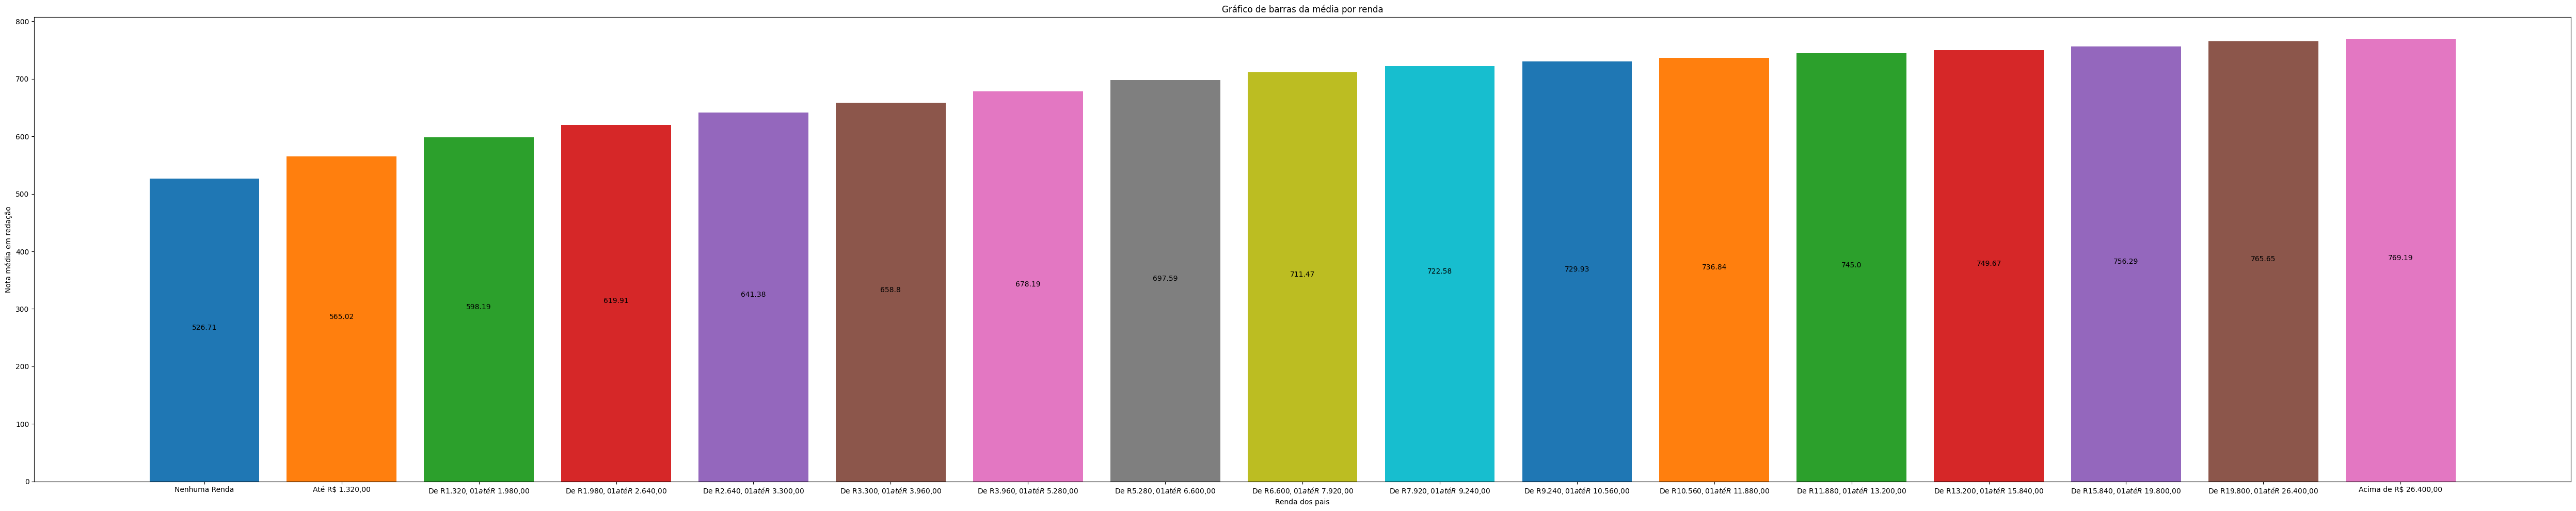

In [23]:
plt.figure(figsize=(50, 10))

for data in data_income.values:
    plt.bar(data[4], data[3])
    plt.text(data[0], data[3] / 2, data[3], ha='center')


plt.xlabel('Renda dos pais')
plt.ylabel('Nota média em redação')
plt.title('Gráfico de barras da média por renda')
plt.tight_layout()
plt.show()
plt.close()